In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import keras
import keras_preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import mean_squared_error

In [21]:
df = pd.read_excel('/content/Air.xlsx')
df['Time']=df['Time'].apply(lambda x: int(x.strftime('%H')))


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.month
# df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')
# df.set_index('Date',inplace=True)
# df['Date']=df.index.month
# df.reset_index(inplace=True)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,3,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,3,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,3,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,3,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,10,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,4,11,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,4,12,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,4,13,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [22]:
df.isna().sum()
df=df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   int64  
 1   Time           9357 non-null   int64  
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.1 MB


In [56]:
x = df.sample(frac=0.8, random_state=0)
x_test = df.drop(x.index)
train_features = x.copy()
test_features = x_test.copy()
y = train_features.pop('RH')
y_test = test_features.pop('RH')


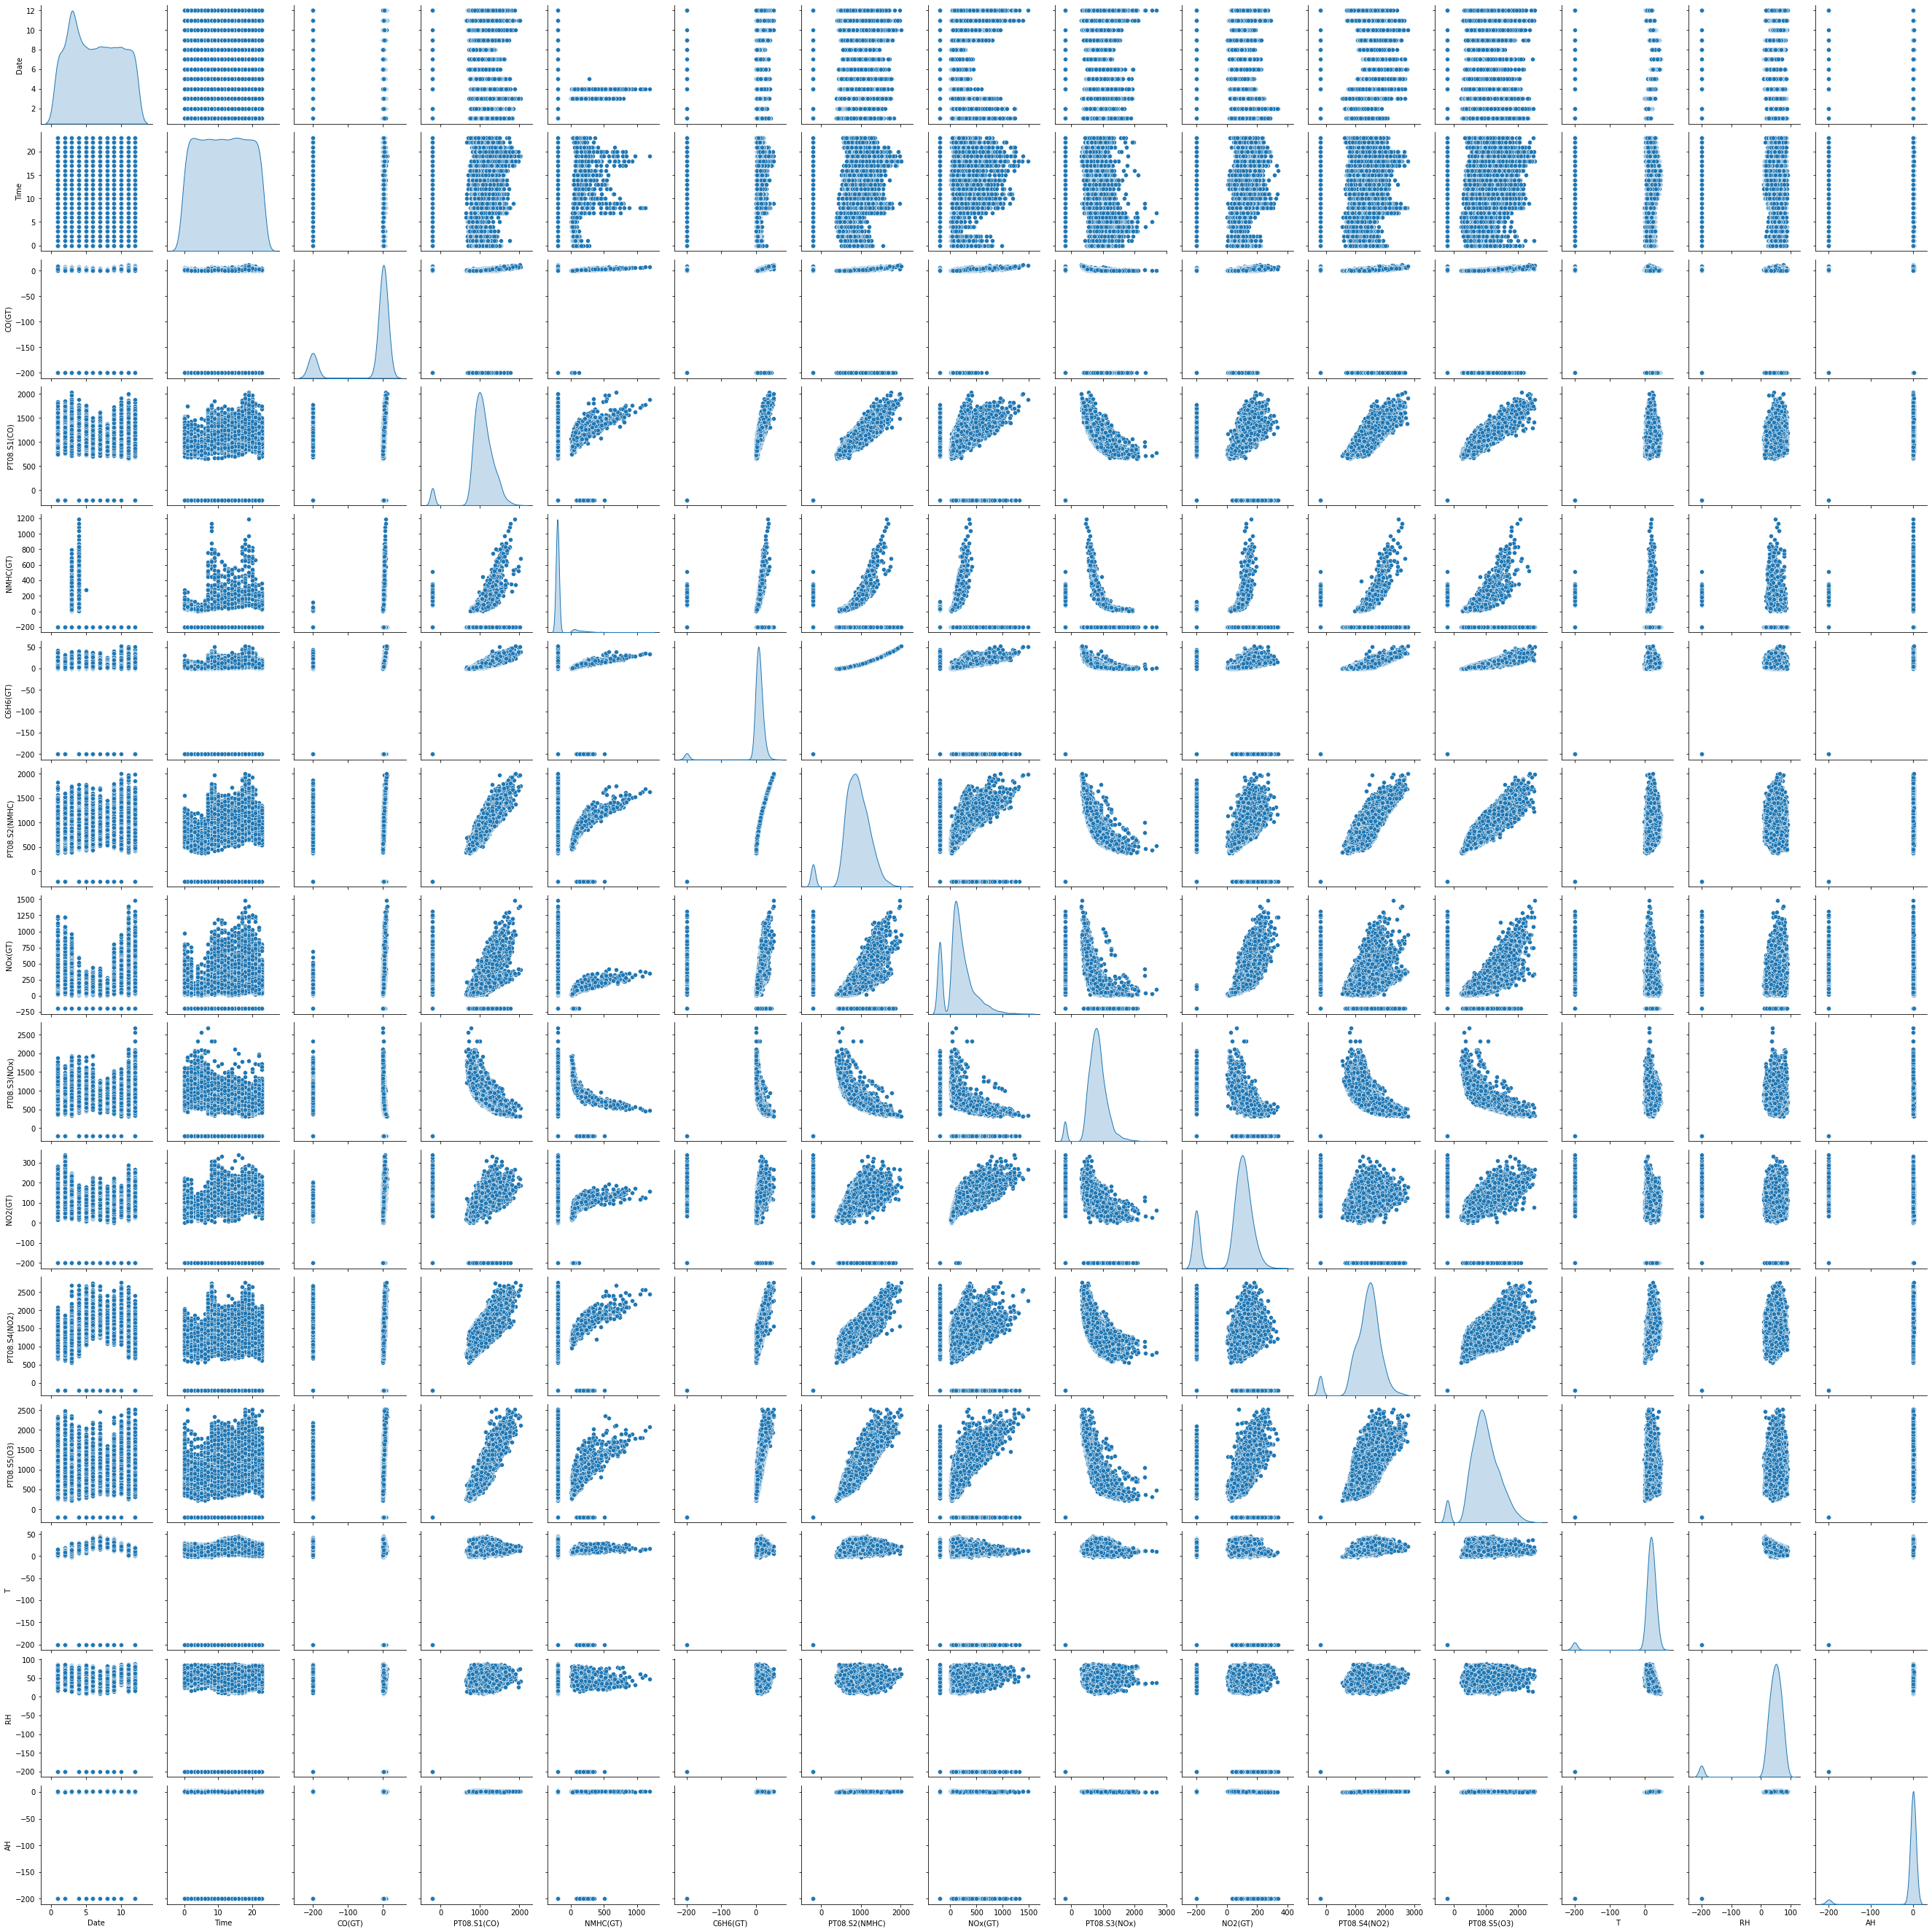

In [57]:
sns.pairplot(x[['Date','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']], diag_kind='kde')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [58]:
normalizer.mean.numpy()

array([[   6.3235373,   11.487847 ,  -34.28761  , 1046.1337   ,
        -158.6907   ,    1.7176325,  891.8333   ,  166.49565  ,
         797.43475  ,   57.187416 , 1388.1943   ,  970.54803  ,
           9.702119 ,   -6.924072 ]], dtype=float32)

In [62]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(75, activation='relu'),
      layers.Dense(45, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RH]')
  plt.legend()
  plt.grid(True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 75)                1125      
                                                                 
 dense_10 (Dense)            (None, 45)                3420      
                                                                 
 dense_11 (Dense)            (None, 1)                 46        
                                                                 
Total params: 4,620
Trainable params: 4,591
Non-trainable params: 29
_________________________________________________________________
None


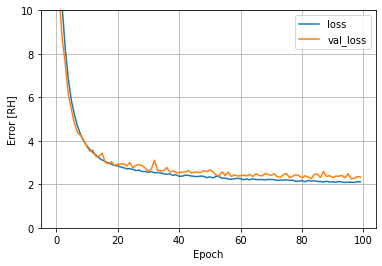

In [63]:
network1 = build_and_compile_model(normalizer)
print(network1.summary())
history = network1.fit(
    train_features,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [64]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(30, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(30, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 30)                450       
                                                                 
 dense_13 (Dense)            (None, 50)                1550      
                                                                 
 dense_14 (Dense)            (None, 30)                1530      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,590
Trainable params: 3,561
Non-trainable params: 29
___________________________________________________

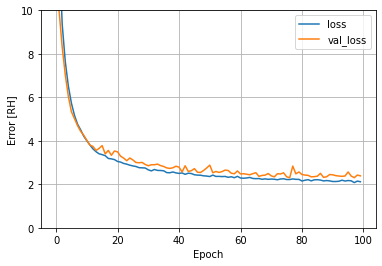

In [65]:
network2 = build_and_compile_model(normalizer)
print(network2.summary())
history = network2.fit(
    train_features,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [66]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(70, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(60, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_16 (Dense)            (None, 70)                1050      
                                                                 
 dense_17 (Dense)            (None, 50)                3550      
                                                                 
 dense_18 (Dense)            (None, 20)                1020      
                                                                 
 dense_19 (Dense)            (None, 60)                1260      
                                                                 
 dense_20 (Dense)            (None, 1)                 61        
                                                      

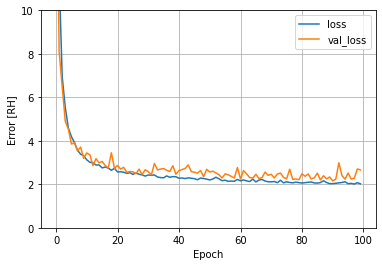

In [67]:
network3 = build_and_compile_model(normalizer)
print(network3.summary())
history = network3.fit(
    train_features,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 75)                1125      
                                                                 
 dense_22 (Dense)            (None, 90)                6840      
                                                                 
 dense_23 (Dense)            (None, 1)                 91        
                                                                 
Total params: 8,085
Trainable params: 8,056
Non-trainable params: 29
_________________________________________________________________
None


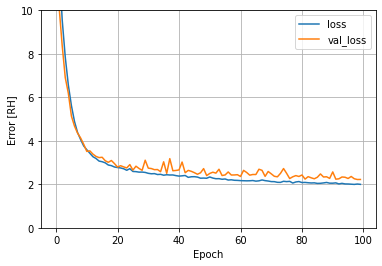

In [68]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(75, activation='relu'),
      layers.Dense(90, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

network4 = build_and_compile_model(normalizer)
print(network4.summary())
history = network4.fit(
    train_features,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 14)               29        
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 70)                1050      
                                                                 
 dense_25 (Dense)            (None, 60)                4260      
                                                                 
 dense_26 (Dense)            (None, 75)                4575      
                                                                 
 dense_27 (Dense)            (None, 60)                4560      
                                                                 
 dense_28 (Dense)            (None, 1)                 61        
                                                      

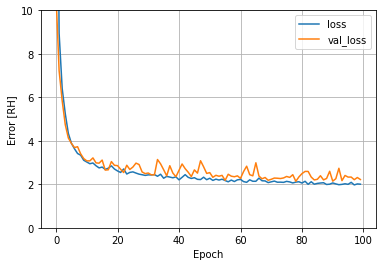

In [69]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(70, activation='relu'),
      layers.Dense(60, activation='relu'),
      layers.Dense(75, activation='relu'),
      layers.Dense(60, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

network5 = build_and_compile_model(normalizer)
print(network5.summary())
history = network5.fit(
    train_features,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [70]:
test_results = {}
test_results['network1'] = network1.evaluate(test_features, y_test, verbose=0)
test_results['network2'] = network2.evaluate(test_features, y_test, verbose=0)
test_results['network3'] = network3.evaluate(test_features, y_test, verbose=0)
test_results['network4'] = network4.evaluate(test_features, y_test, verbose=0)
test_results['network5'] = network5.evaluate(test_features, y_test, verbose=0)

In [72]:
pd.DataFrame(test_results, index=['Mean absolute error [RH]']).T

,Mean absolute error [RH]
network1,2.310812
network2,2.385963
network3,2.617584
network4,2.206239
network5,2.246529


In [73]:
print('So, the least error occurs in network 4, which has the maximum number of nodes(but less layers).')

So, the least error occurs in network 4, which has the maximum number of nodes(but less layers).
